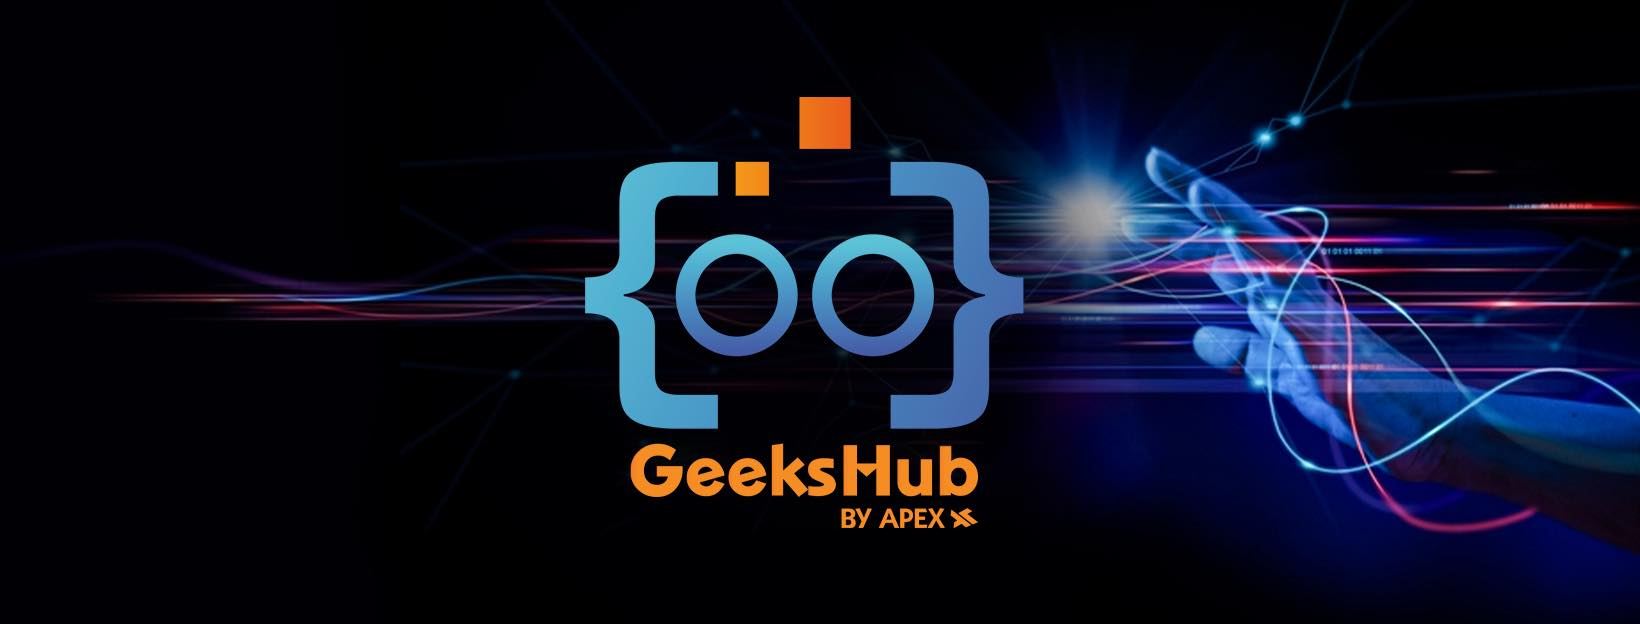
# Hyperparameter Tuning and Optmisation of Models

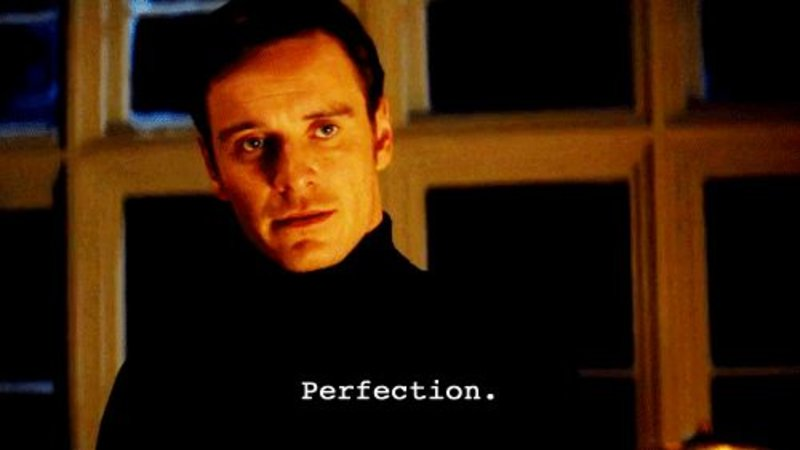


*A **hyperparamter** is an argument defined in the model class that controls how the model is trained on the data*

*A **parameter** is a value outputted after training used for producing preditcions. Example : coefficients in linear regression*

When optmising/tuning models we need to look on what is wrong in the first place. Questions to ask :
   * is the model overfitting or underfitting?
   * is there anything wrong with the data ? (imbalanced classes or outliers for example)
   * what is the best algorithm to work with?
   * how can we build a stronger if its is overfitting?
       * can we play around with the algroithm we chose?
       * can we combine different algorithms together?
       * can we choose better features? (feature selection in a future lecture)

## Case Study of Today: Thoracic Surgery 

In this project we are trying to predicting using EHR data collected from Wroclaw Thoracic Surgery Centre in Poland retrospectively if patients survive 1 year post-surgery 


1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)




In [63]:
# imports
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,plot_precision_recall_curve,recall_score,precision_score,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [64]:
from scipy.io.arff import loadarff 
raw_data = loadarff('ThoraricSurgery.arff')
data = pd.DataFrame(raw_data[0])
data

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,b'DGN2',3.88,2.12,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC13',b'F',b'F',b'F',b'T',b'F',63.0,b'F'
466,b'DGN3',3.76,3.12,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',61.0,b'F'
467,b'DGN3',3.04,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC13',b'F',b'F',b'F',b'F',b'F',52.0,b'F'
468,b'DGN3',1.96,1.68,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC12',b'F',b'F',b'F',b'T',b'F',79.0,b'F'


## 1. Data Preprocessing

In [65]:
data.isna().sum()

DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

In [66]:
data.dtypes

DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE        float64
Risk1Yr     object
dtype: object

In [67]:
for col in data.columns:
    print("\n",data[col].value_counts())


 b'DGN3'    349
b'DGN2'     52
b'DGN4'     47
b'DGN5'     15
b'DGN6'      4
b'DGN8'      2
b'DGN1'      1
Name: DGN, dtype: int64

 2.60    13
2.96    13
3.04    11
2.48    11
3.40    11
        ..
2.87     1
4.76     1
2.46     1
5.52     1
5.20     1
Name: PRE4, Length: 134, dtype: int64

 2.08     16
2.36     14
2.16     13
1.88     12
2.32     12
         ..
2.90      1
2.11      1
72.80     1
4.08      1
4.10      1
Name: PRE5, Length: 136, dtype: int64

 b'PRZ1'    313
b'PRZ0'    130
b'PRZ2'     27
Name: PRE6, dtype: int64

 b'F'    439
b'T'     31
Name: PRE7, dtype: int64

 b'F'    402
b'T'     68
Name: PRE8, dtype: int64

 b'F'    439
b'T'     31
Name: PRE9, dtype: int64

 b'T'    323
b'F'    147
Name: PRE10, dtype: int64

 b'F'    392
b'T'     78
Name: PRE11, dtype: int64

 b'OC12'    257
b'OC11'    177
b'OC13'     19
b'OC14'     17
Name: PRE14, dtype: int64

 b'F'    435
b'T'     35
Name: PRE17, dtype: int64

 b'F'    468
b'T'      2
Name: PRE19, dtype: int64

 b'F'    462
b

In [68]:
## splitting the data
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [69]:
## scale numerical varaibles 
scaler=MinMaxScaler()
scaler.fit(x_train[["AGE","PRE5","PRE4"]])
x_train[["AGE","PRE5","PRE4"]]=scaler.transform(x_train[["AGE","PRE5","PRE4"]])
x_test[["AGE","PRE5","PRE4"]]=scaler.transform(x_test[["AGE","PRE5","PRE4"]])

In [70]:
#replace all trues and falses by 1 and 0 
rep={b'T':1,b'F':0}
x_train.replace(rep,inplace=True)
x_test.replace(rep,inplace=True)

In [71]:
x_train

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
72,b'DGN3',0.500000,0.022967,b'PRZ0',0,0,0,0,0,b'OC11',0,0,0,1,0,0.636364
90,b'DGN4',0.500000,0.020623,b'PRZ1',0,1,0,1,0,b'OC12',0,0,0,1,0,0.893939
124,b'DGN3',0.461538,0.021561,b'PRZ1',0,0,0,1,1,b'OC12',0,0,0,1,0,0.833333
415,b'DGN3',0.471154,0.016757,b'PRZ0',0,0,0,0,0,b'OC11',0,0,0,0,0,0.636364
277,b'DGN3',0.461538,0.019686,b'PRZ1',0,0,0,1,0,b'OC12',1,0,0,1,0,0.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,b'DGN3',0.250000,0.013124,b'PRZ1',0,0,0,1,0,b'OC12',0,0,0,1,0,0.515152
270,b'DGN3',0.259615,0.008906,b'PRZ1',0,0,0,1,1,b'OC12',0,0,0,1,0,0.757576
348,b'DGN2',0.663462,0.030935,b'PRZ1',0,0,0,0,1,b'OC11',0,0,0,1,0,0.272727
435,b'DGN3',0.365385,0.012655,b'PRZ1',0,0,0,1,0,b'OC11',0,0,0,1,0,0.530303


In [72]:
## onehotencoding of remaining categorical variables 
cat_cols=["DGN","PRE6","PRE14"]
encoder=OneHotEncoder()
encoder.fit(x_train[cat_cols])
x_train_dummies=encoder.transform(x_train[cat_cols]).toarray()

x_test_dummies=encoder.transform(x_test[cat_cols]).toarray()


x_train_dummies.shape,x_test_dummies.shape


((423, 14), (47, 14))

In [73]:
x_train.drop(cat_cols,inplace=True,axis=1)
x_train=np.concatenate([np.array(x_train),x_train_dummies],axis=1)

x_train.shape

(423, 27)

In [74]:
x_test.drop(cat_cols,inplace=True,axis=1)

x_test=np.concatenate([np.array(x_test),x_test_dummies],axis=1)



In [75]:
y_test=np.where(y_test==b'F',0,1)
y_train=np.where(y_train==b'F',0,1)

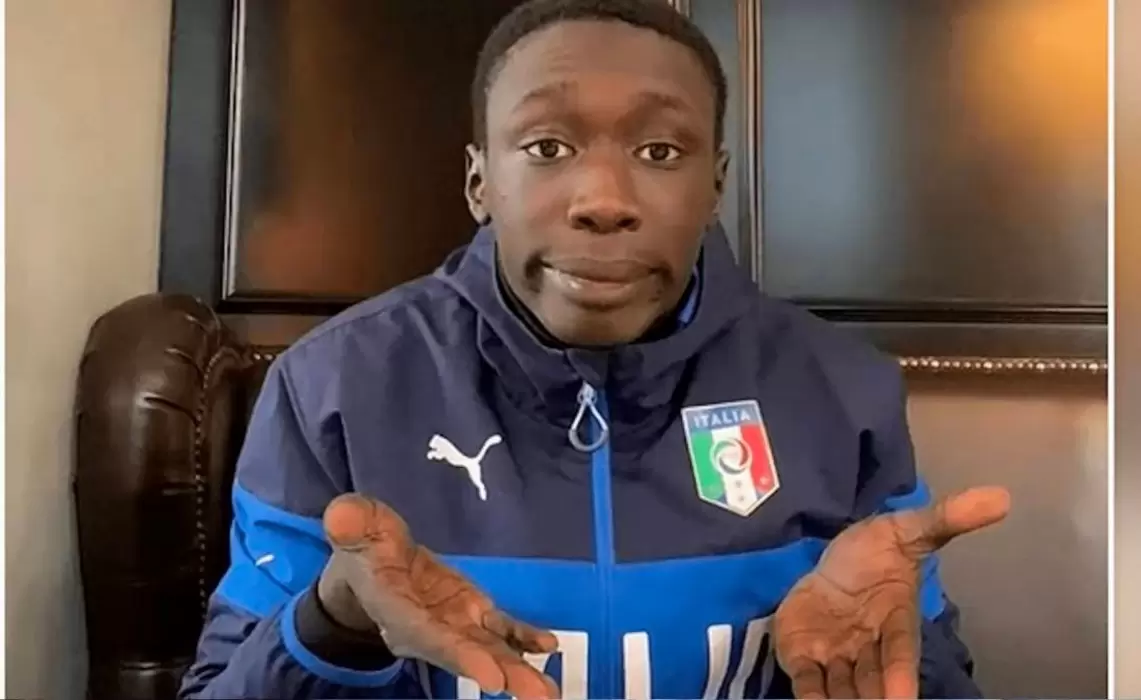

In [76]:
x_train

array([[0.5       , 0.02296696, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.02062339, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.46153846, 0.02156082, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.66346154, 0.03093508, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36538462, 0.01265526, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69230769, 0.02671666, 0.        , ..., 1.        , 0.        ,
        0.        ]])

here we have a model ready dataset !!

## Manually Tuning Models

In [77]:
## define a function that takes model, trains it and outputs metrics 
def train(model):
    model.fit(x_train,y_train)
    pred_test=model.predict(x_test)
    pred_train=model.predict(x_train)
    
    print(" Accuracy on Train: ",f"{accuracy_score(y_train,pred_train):.2f}\n",
          "Accuracy on Test: ",f"{accuracy_score(y_test,pred_test):.2f}")

In [78]:
randforest=RandomForestClassifier()
train(randforest)

 Accuracy on Train:  1.00
 Accuracy on Test:  0.81


Mmmm. the model is overfitting clearly so we can try tune some its hyperparameters, for example Randomforests is a group of decision tree algroithms working together, we can change the setting of it to control how many decision trees does it use by tuning the hyperparameter *n_estimators* which by default is 100

In [80]:
randforest=RandomForestClassifier(n_estimators=10)
train(randforest)

 Accuracy on Train:  0.98
 Accuracy on Test:  0.79


model is still overfitting we can tune another hypeparameter called *max_depth* which decides on the size of individual trees by decreasing it. Default value is None

In [81]:
randforest=RandomForestClassifier(n_estimators=10,max_depth=5)
train(randforest)

 Accuracy on Train:  0.88
 Accuracy on Test:  0.81


Nice we are getting better results!!!

However there are ALOT of hypeparameters, for example, this is a fully defined random forest model:
```python 

    randforest=RandomForestClassifier(n_estimators=100,
                                      criterion="gini",
                                      max_depth=None,
                                      min_samples_split=1,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features="auto",
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0,
                                      min_impurity_split=None,
                                      bootstrap=True,
                                      oob_score=False,
                                      n_jobs=None,
                                      random_state=None,
                                      verbose=0,
                                      warm_start=False,
                                      class_weight=None,
                                      ccp_alpha=0.0,
                                      max_samples=None)
   ```
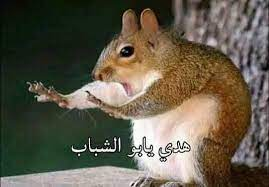



* What hyperparamters to tune?
        ( we can not tune all the hyperparameters!!!)
* What setting to put for each?
        ( not all hyperparameters are "incremental and decremental" as n_estimators or max_depth + it always a good idea to try different settings)
* What combinations are the best?
       ( manually trying out all combinations is a burden)

## Automatically Tuning Models

There are two main ways to tune models in a simulated:

1. *RandomisedSearchCV* is a function by sklearn that creates random combinations based on a given grid of parameters to find the best parameters 


2. *GridSearchCV* tries every possible combination of a given grid of paramaters 

In [86]:
grid_params={
    "n_estimators":[100,200,250,300,400,500],
    "max_depth": [1,2,5,7,11,15],
    "min_samples_split":[1,2,5,10,15,100],
    "criterion": ["gini","entropy"]
}

In [90]:
randforest=RandomForestClassifier()
rcv=RandomizedSearchCV(randforest,param_distributions=grid_params,n_iter=10,cv=5,
                      n_jobs=-1,verbose=True)

rcv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 7, 11, 15],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 250, 300,
                                                         400, 500]},
                   verbose=True)

In [91]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_split=5,
                       n_estimators=200)

In [92]:
rcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_depth': 1,
 'criterion': 'entropy'}

In [93]:
rcv.best_score_

0.8557983193277311

In [94]:
## define a function that takes model, trains it and outputs metrics 
def test(model):
    pred_test=model.predict(x_test)
    pred_train=model.predict(x_train)
    
    print(" Accuracy on Train: ",f"{accuracy_score(y_train,pred_train):.2f}\n",
          "Accuracy on Test: ",f"{accuracy_score(y_test,pred_test):.2f}")
    
test(rcv)

 Accuracy on Train:  0.86
 Accuracy on Test:  0.81


In [97]:
randforest=RandomForestClassifier()
gcv=GridSearchCV(randforest,param_grid=grid_params,cv=5,
                      n_jobs=-1,verbose=True)

gcv.fit(x_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 7, 11, 15],
                         'min_samples_split': [1, 2, 5, 10, 15, 100],
                         'n_estimators': [100, 200, 250, 300, 400, 500]},
             verbose=True)

In [98]:
test(gcv)

 Accuracy on Train:  0.86
 Accuracy on Test:  0.81


# These are the hypeparamters and the possible grids for each model 

### Linear Regression
```python 
grids={"fit_intercept":[True,False],
       "normalize":[True,False]}
```

### Ridge Regression
```python 
grids={"alpha":[0.01,0.1,1.0,10,100],
       "fit_intercept":[True,False],
       "normalize":[True,False]}
```


### Lasso Regression
```python 
grids={"alpha":[0.01,0.1,1.0,10,100],
       "normalize":[True,False]}
```


### K-neigbours
```python 
grids={"n_neigbours":[2,4,8,16,18,20],
      "p":[2,3]}
```


### SVM
```python 
grids={"C":[0.001,0.01,1,10,100,1000],
      "class_weight":["balanced",None]}
```

### Logistic Regression
```python 
grids={"C":[0.001,0.01,1,10,100,1000],
      "penalty":["l1","l2"]}
```

### RandomForest
```python 
grids={"n_estimators":[120,300,500,800,1200],
      "max_depth":[5,8,15,25,30,None],
      "min_samples_split":[1,2,5,10,15,100],
      "min_samples_leaf":[1,2,5,10],
      "max_features":["log2","sqrt",None]}
```


### XGBoost
```python 
grids={"eta":[0.01,0.015,0.025,0.05,0.1],
       "gamma":[0.05,0.1,0.3,0.5,0.7,0.9,1.0],
      "max_depth":[3,5,7,9,12,15,17,25],
      "min_child_weight":[1,3,5,7],
      "subsample":[0.6,0.7,0.8,0.9,1.0],
      "colsample_bytree":[0.6,0.7,0.8,0.9,1.0],
      "lambda":np.arange(0.1,1,0.1),
      "alpha":[0,0.1,0.5,1.0]}
```






## Creating a Grand Attempt to Try Everything

In [113]:
grand_dict={
    
KNeighborsClassifier():{"n_neighbors":[2,4,8,16,18,20],
      "p":[2,3]},
    SVC():{"C":[0.001,0.01,1,10,100,1000],
      "class_weight":["balanced",None]},
    
    LogisticRegression():{"C":[0.001,0.01,1,10,100,1000],
      "penalty":["l1","l2"]},
    
    RandomForestClassifier():{"n_estimators":[120,300,500,800,1200],
      "max_depth":[5,8,15,25,30,None],
      "min_samples_split":[1,2,5,10,15,100],
      "min_samples_leaf":[1,2,5,10],
      "max_features":["log2","sqrt",None]}}




In [118]:
##modify test function to return test accuracy
def test(model):
    pred_test=model.predict(x_test)
    return accuracy_score(y_test,pred_test)
    

In [121]:
##for loop 
best_accuracy_test=0
for model,params in grand_dict.items():
    print(model)
    rcv=RandomizedSearchCV(model,param_distributions=params,n_iter=10,cv=5)
    rcv.fit(x_train,y_train)
    acc_test=test(rcv)
    if acc_test>best_accuracy_test:
        best_accuracy_test=acc_test
        best_model=model
        best_params=rcv.best_params_
    

KNeighborsClassifier()
SVC()
LogisticRegression()
RandomForestClassifier()


In [122]:
best_accuracy_test,best_model,best_params

(0.8085106382978723, KNeighborsClassifier(), {'p': 3, 'n_neighbors': 16})